<a href="https://colab.research.google.com/github/DCI-alxogm/ml2023-leo0nel09/blob/main/Ago25-26/tarea_agosto26.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def regresion_polinomica(x, y, grado):
    # Crear matriz de diseño

    X = np.vander(x, grado + 1, increasing=True)    #La matriz X contiene las diferentes potencial, por medio de una matriz de Vandermonde
    t = y
    XX = np.dot(X.T, X)                             # calcula la matriz XX como el producto punto de la transposición de X con X
    invXX = np.linalg.inv(XX)                       #Se calcula la inversa de la matriz XX y se guarda en la variable invXX. Esto es necesario para el cálculo de los pesos.
    Xt = np.dot(X.T, t)                             #Se calcula el producto punto de la transposición de X con t, y se guarda en la variable Xt
    w = np.dot(invXX, Xt)                           #Calculo de los pesos con la inversa de XX y multiplicando por t

    # Calcular los valores predichos usando los pesos w
    y_pred = np.dot(X, w)                           #Calcular la prediccion de Y, producto de X (diferentes potencias) y w(Pesos)

    # Calcular el error cuadrático medio
    mse = np.mean((y_pred - y)**2)

    return w, mse

In [4]:
# Cargar los datos
data = np.loadtxt("/content/olympic100m_men.txt", delimiter=",").T
x = data[0]
y = data[1]

In [5]:
# Preprocesar los años para que estén en una escala manejable
x = (x - 1896) / 4

# Número máximo de grados polinómicos para ajuste
grado_maximo = 8


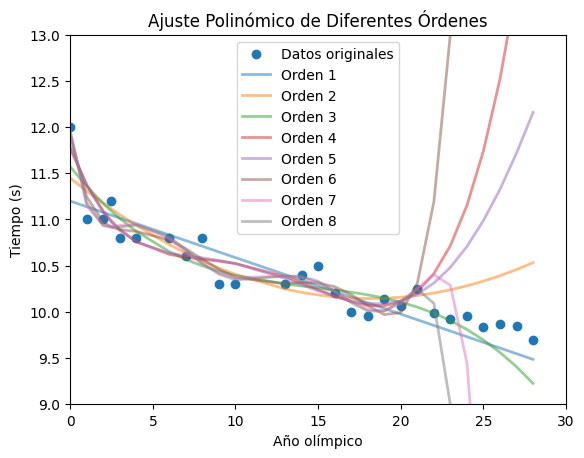

In [11]:
plt.scatter(x, y, label="Datos originales")

for grado in range(1, grado_maximo + 1):                                             #Este bucle itera a través de los valores de grado desde 1 hasta grado_maximo
    w_test, costo = regresion_polinomica(x[:20], y[:20], grado)                      #Usan la funcion regresion_polinomica con los primero 20 datos x y
    curva_ajustada = np.zeros_like(x)                                                #Se crea un arreglo curva_ajustada del mismo tamaño que el arreglo x, inicializado con ceros.

    for i in range(len(w_test)):
        curva_ajustada += w_test[i] * x**i                                             #Curva ajusta = w0+w1*x^1+w2*x^2+w3*x^3


    plt.plot(x, curva_ajustada, '-', linewidth=2, label=f'Orden {grado}', alpha=0.5)
# Ajustar límites del eje Y
plt.ylim(9, 13)
plt.xlim(0, 30)

plt.legend()
plt.xlabel('Año olímpico')
plt.ylabel('Tiempo (s)')
plt.title('Ajuste Polinómico de Diferentes Órdenes')
plt.show()


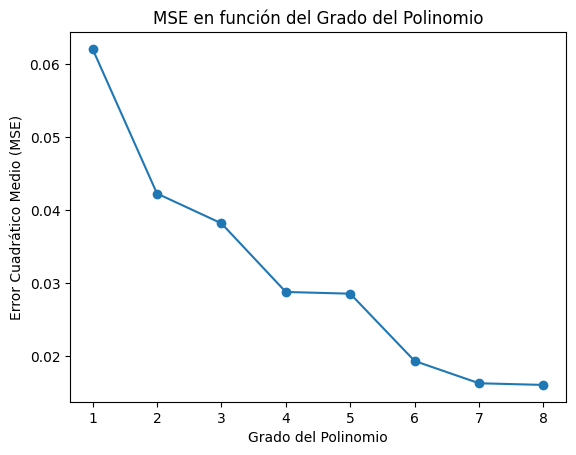

In [12]:
mse_values = []

for grado in range(1, grado_maximo + 1):
    w_test, mse = regresion_polinomica(x[:20], y[:20], grado)       # mse como costo representan lo mismo: el Error Cuadrático Medio
    mse_values.append(mse)                                          #El valor del MSE obtenido en la iteración actual se agrega a la lista mse_values

# Graficar el MSE en función del grado del polinomio
plt.plot(range(1, grado_maximo + 1), mse_values, marker='o')
plt.xlabel('Grado del Polinomio')
plt.ylabel('Error Cuadrático Medio (MSE)')
plt.title('MSE en función del Grado del Polinomio')
plt.show()

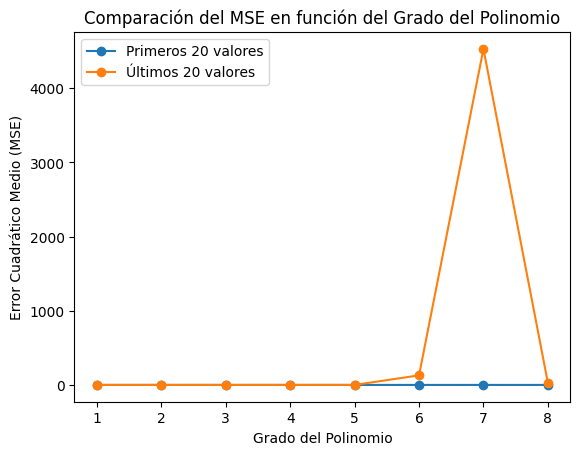

In [13]:
# Calcular MSE en función del grado del polinomio para los primeros 20 valores
mse_train_values = []
for grado in range(1, grado_maximo + 1):
    w_train, mse_train = regresion_polinomica(x[:20], y[:20], grado)
    mse_train_values.append(mse_train)

# Calcular MSE en función del grado del polinomio para los últimos 20 valores
mse_val_values = []
for grado in range(1, grado_maximo + 1):
    w_val, mse_val = regresion_polinomica(x[20:], y[20:], grado)
    mse_val_values.append(mse_val)

# Graficar el MSE en función del grado del polinomio para ambos conjuntos
plt.plot(range(1, grado_maximo + 1), mse_train_values, marker='o', label='Primeros 20 valores')
plt.plot(range(1, grado_maximo + 1), mse_val_values, marker='o', label='Últimos 20 valores')
plt.xlabel('Grado del Polinomio')
plt.ylabel('Error Cuadrático Medio (MSE)')
plt.title('Comparación del MSE en función del Grado del Polinomio')
plt.legend()
plt.show()


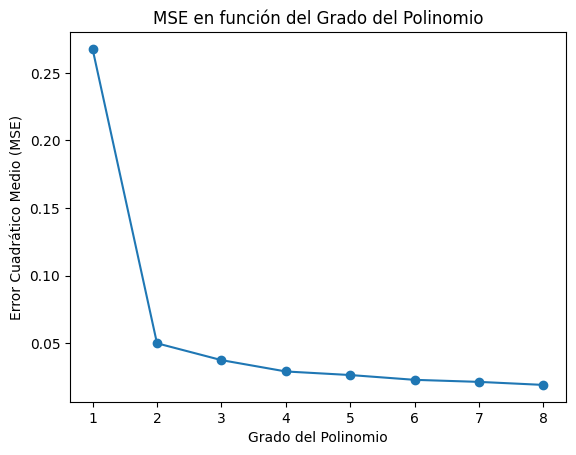

In [15]:
mse_cross_array= []
for grado in range(grado_maximo):
    mse_v = 0.0
    for i in range(len(x)):
        x_cross = np.delete(x, i)
        y_cross = np.delete(y, i)
        w_cross, mse_cross = regresion_polinomica(x_cross, y_cross, grado)
        mse_v += mse_cross
    mse_cross_array.append(mse_v / len(x))


plt.plot(range(1, grado_maximo + 1), mse_cross_array, marker='o')
plt.xlabel('Grado del Polinomio')
plt.ylabel('Error Cuadrático Medio (MSE)')
plt.title('MSE en función del Grado del Polinomio')
plt.show()

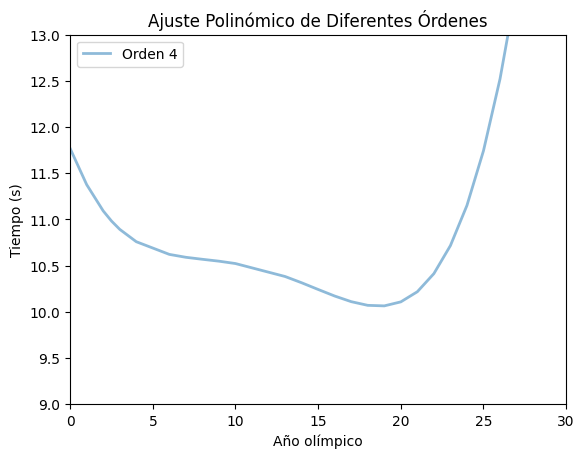

In [24]:
def derivada(x)

for grado in range(4, 5):                                             #Este bucle itera a través de los valores de grado desde 1 hasta grado_maximo
    w_test, costo = regresion_polinomica(x[:20], y[:20], grado)                      #Usan la funcion regresion_polinomica con los primero 20 datos x y
    curva_ajustada = np.zeros_like(x)                                                #Se crea un arreglo curva_ajustada del mismo tamaño que el arreglo x, inicializado con ceros.

    for i in range(len(w_test)):
        curva_ajustada += w_test[i] * x**i                                             #Curva ajusta = w0+w1*x^1+w2*x^2+w3*x^3



    plt.plot(x, curva_ajustada, '-', linewidth=2, label=f'Orden {grado}', alpha=0.5)
# Ajustar límites del eje Y
plt.ylim(9, 13)
plt.xlim(0, 30)

plt.legend()
plt.xlabel('Año olímpico')
plt.ylabel('Tiempo (s)')
plt.title('Ajuste Polinómico de Diferentes Órdenes')
plt.show()


Valor de x en el mínimo: 13.997469753250511
Valor mínimo de la derivada: -0.06813808066206084


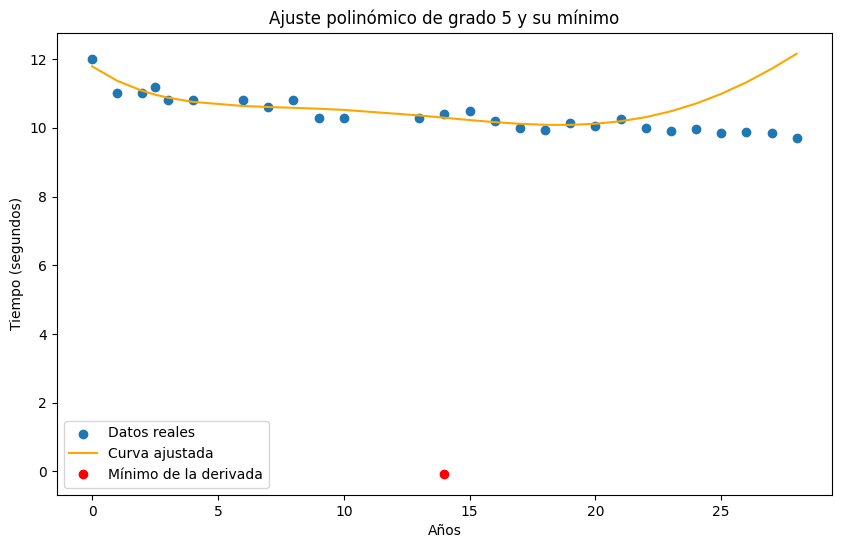

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize_scalar

def regresion_polinomica(x, y, grado):
    X = np.vander(x, grado + 1, increasing=True)
    t = y
    XX = np.dot(X.T, X)
    invXX = np.linalg.inv(XX)
    Xt = np.dot(X.T, t)
    w = np.dot(invXX, Xt)

    y_pred = np.dot(X, w)
    mse = np.mean((y_pred - y)**2)

    return w, mse

def y_derivada(x, w):
    derivada = np.zeros_like(x)
    for i in range(len(w)):
        derivada += i * w[i] * x**(i - 1)
    return derivada

data = np.loadtxt("/content/olympic100m_men.txt", delimiter=",").T
x = data[0]
y = data[1]
x = (x - 1896) / 4

grado = 5

w_test, costo = regresion_polinomica(x[:20], y[:20], grado)

def curva_derivada(x, w):
    derivada = np.zeros_like(x)
    for i in range(1, len(w)):
        derivada += i * w[i] * x**(i - 1)
    return derivada

func_minimizar = lambda x: curva_derivada(x, w_test)
resultado = minimize_scalar(func_minimizar, bounds=(np.min(x), np.max(x)))  # Limita el rango de búsqueda
x_minimo = resultado.x
valor_minimo = resultado.fun

print(f"Valor de x en el mínimo: {x_minimo}")
print(f"Valor mínimo de la derivada: {valor_minimo}")

curva_ajustada = np.zeros_like(x)
for i in range(len(w_test)):
    curva_ajustada += w_test[i] * x**i

plt.figure(figsize=(10, 6))
plt.scatter(x, y, label='Datos reales')
plt.plot(x, curva_ajustada, label='Curva ajustada', color='orange')
plt.plot(x_minimo, valor_minimo, 'ro', label='Mínimo de la derivada')
plt.xlabel('Años')
plt.ylabel('Tiempo (segundos)')
plt.legend()
plt.title(f'Ajuste polinómico de grado {grado} y su mínimo')
plt.show()
